In [ ]:
import numpy as np
import pandas as pd

In [ ]:
spam_df=pd.read_csv("/content/spam_complete.csv")

In [ ]:
spam_df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,SPAM/NO_SPAM
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
x=np.array(spam_df[['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']])
y=np.array(spam_df[['SPAM/NO_SPAM']])

In [ ]:
#splitting into training and testing data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [ ]:
#Normalising the IV
from sklearn import preprocessing
sc=preprocessing.StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
#running a loop to store the values of precision and misclassification for different values of regularisation parameter 
pre=[]
mis=[]
for i in range(1,50):
  from sklearn import svm
  clf=svm.SVC(C=i,kernel="rbf")
  clf.fit(x_train,y_train)
  yhat=clf.predict(x_test)
  from sklearn.metrics import classification_report,confusion_matrix
  #print("The confusion matrix = \n",confusion_matrix(y_test,yhat))
  #print("The Classification Report = \n", classification_report(y_test,yhat))
  report=(classification_report(y_test,yhat,output_dict=True))
  pre.append(report["1"]['precision'])
  con=confusion_matrix(y_test,yhat)
  mis.append((con[0][1]+con[1][0])/(con[0][0]+con[0][1]+con[1][0]+con[1][1]))

In [ ]:
#printing the regularisation parameter giving the best precision and misclassification for the given random split
print("for c = ",mis.index(min(mis))+1,", misclassification = ",min(mis))
print("for c = ",pre.index(max(pre))+1,", precision = ",max(pre))

for c =  10 , misclassification =  0.0666183924692252
for c =  14 , precision =  0.9329388560157791


Text(0, 0.5, 'value of misclassification')

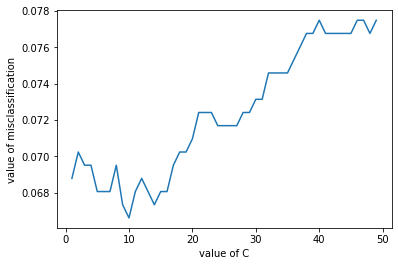

In [ ]:
#plotting the value of misclassification for different C value
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(range(1,50),mis)
plt.xlabel("value of C")
plt.ylabel("value of misclassification")

Text(0, 0.5, 'value of precision')

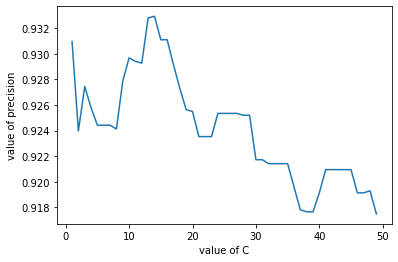

In [ ]:
#plotting the value of precision for different C value
plt.plot(range(1,50),pre)
plt.xlabel("value of C")
plt.ylabel("value of precision")